In [38]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import sys
import torch
import numpy as np
import pathlib
path = pathlib.Path()
# Insert all modules a folder above
sys.path.insert(0, str(path.absolute().parent))
from ssd.config.defaults import cfg
from ssd.modeling.box_head.prior_box import PriorBox
from ssd.utils.box_utils import convert_locations_to_boxes

In [2]:
config_path = "../configs/waymo_resnet.yaml"
cfg.merge_from_file(config_path)

In [3]:
prior_box = PriorBox(cfg)

In [4]:
priors = prior_box()
print("Prior box shape:", priors.shape)
print("First prior example:", priors[:5])
locations = torch.zeros_like(priors)[None]
priors_as_location = convert_locations_to_boxes(locations, priors,cfg.MODEL.CENTER_VARIANCE, cfg.MODEL.SIZE_VARIANCE)[0]

Prior box shape: torch.Size([7248, 4])
First prior example: tensor([[0.0125, 0.0167, 0.0938, 0.0938],
        [0.0125, 0.0167, 0.1326, 0.1326],
        [0.0125, 0.0167, 0.1326, 0.0663],
        [0.0125, 0.0167, 0.0663, 0.1326],
        [0.0375, 0.0167, 0.0938, 0.0938]])


In [82]:
def plot_bbox(box):
    cx, cy, w, h = box
    x1, y1 = cx + w/2, cy + h/2
    x0, y0 = cx - w/2, cy - h/2
       
    # rectangles
    plt.plot(
        [x0, x0, x1, x1, x0],
        [y0, y1, y1, y0, y0]
    )
    
def plot_box_centers(boxes, width=0.01, height=0.01):
    fig = plt.figure(0)
    ax = fig.add_subplot(111, aspect='equal')
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    for box in boxes:
        cx, cy, w, h = box
        e = Ellipse(xy=[cx, cy], width=width, height=height)
        ax.add_artist(e)
        e.set_clip_box(ax.bbox)
        e.set_alpha(rnd.rand())
        e.set_facecolor([.0, .0, .6])

In [83]:
def box_indices():
    feature_maps = cfg.MODEL.PRIORS.FEATURE_MAPS
    boxes_per_location = cfg.MODEL.PRIORS.BOXES_PER_LOCATION

    # total amount of boxes per feature map
    box_indices = [0]
    for i, ((w, h), b) in enumerate(zip(feature_maps, boxes_per_location)):
        n_boxes = w*h*b
        # print(f"Feature map {i} [{w}, {h}]: {n_boxes}")
        box_indices.append(box_indices[i] + n_boxes)
    
    return box_indices

[0, 4800, 6600, 7080, 7200, 7224, 7248]
[4, 6, 6, 6, 4, 4]
[tensor([0.5000, 0.5000, 0.8250, 0.8250])]
[tensor([0.5000, 0.5000, 0.9012, 0.9012])]
[tensor([0.5000, 0.5000, 1.0000, 0.5834])]
[tensor([0.5000, 0.5000, 0.5834, 1.0000])]
[tensor([1.0000, 0.5000, 0.8250, 0.8250])]
[tensor([1.0000, 0.5000, 0.9012, 0.9012])]
[tensor([1.0000, 0.5000, 1.0000, 0.5834])]
[tensor([1.0000, 0.5000, 0.5834, 1.0000])]
[tensor([1.0000, 0.5000, 0.8250, 0.8250])]
[tensor([1.0000, 0.5000, 0.9012, 0.9012])]
[tensor([1.0000, 0.5000, 1.0000, 0.5834])]
[tensor([1.0000, 0.5000, 0.5834, 1.0000])]
[tensor([0.5000, 1.0000, 0.8250, 0.8250])]
[tensor([0.5000, 1.0000, 0.9012, 0.9012])]
[tensor([0.5000, 1.0000, 1.0000, 0.5834])]
[tensor([0.5000, 1.0000, 0.5834, 1.0000])]
[tensor([1.0000, 1.0000, 0.8250, 0.8250])]
[tensor([1.0000, 1.0000, 0.9012, 0.9012])]
[tensor([1.0000, 1.0000, 1.0000, 0.5834])]
[tensor([1.0000, 1.0000, 0.5834, 1.0000])]
[tensor([1.0000, 1.0000, 0.8250, 0.8250])]
[tensor([1.0000, 1.0000, 0.9012, 0.901

/Users/ulrikah/opt/anaconda3/envs/tdt4295/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


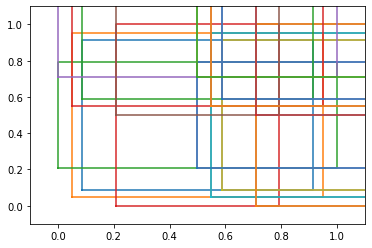

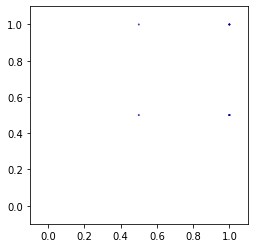

In [104]:
idxs = box_indices()
print(idxs)

prior_idx = [*range(7225, 7249)]

# Visualizing all would take too much
priors_as_location = [x for x in priors_as_location]
#np.random.shuffle(priors_as_location)

# boxes
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])

for idx in prior_idx:
    for prior in priors_as_location[idx-1:idx]:
        plot_bbox(prior)

print(cfg.MODEL.PRIORS.BOXES_PER_LOCATION)
        
# centers
for idx in prior_idx:
    priors = priors_as_location[idx-1:idx]
    print(priors)
    plot_box_centers(priors)